In [1]:
import numpy as np

In [2]:
def entropy(P):
    H =[]
    for p in P:
        if p == 1 or p == 0:
            H.append(0)
        else :
            H.append(-p*np.log2(p))
    
    return sum(H)

In [3]:

alpha = 0.7007205513
beta = 0.5982945793
#alpha = 0.25
#beta = 0.25

Pylx = np.array([[1-alpha , alpha],[beta , 1-beta]])
#Pylx = np.array([[0.75,0.25],[0.25,0.75]])
print('Pylx =',Pylx)

c =( ((beta**beta)*((1-beta)**(1-beta)))/((alpha**alpha)*((1-alpha)**(1-alpha))) )**(1/(1-alpha-beta))
q = (1-(c+1)*beta)/((1+c)*(1-alpha-beta))
#print(q)

px = np.array([q , 1-q]).reshape((2,1))
py = (px.T@Pylx)[0]

Hy = entropy(py)
Hylx = (sum([px[i]*entropy(Pylx[i,:]) for i in range(len(px))]) )[0]
C = Hy - Hylx

print('px =',px)
print('py =',py)
print('Hy = ',Hy)
print('Hylx = ',Hylx)
print('Capacity = ', C)

Pylx = [[0.29927945 0.70072055]
 [0.59829458 0.40170542]]
px = [[0.50546295]
 [0.49453705]]
py = [0.44715351 0.55284649]
Hy =  0.9919267519247422
Hylx =  0.9256738612808089
Capacity =  0.06625289064393336


In [5]:
def ML_decoder_block(yn,Py2lx2):
    inp_alphabet = {0:'00' , 1: '01', 2 : '10' , 3 :'11'}
    out_alphabet = dict(zip(bin_list,[i for i in range(32)]))
    estimate_xn =''
    for i in range(0,len(yn)-4,5):
        estimate_xn = estimate_xn + inp_alphabet[np.argmax(Py5lx5[:,out_alphabet[yn[i:i+5]]])]
    return estimate_xn


In [ ]:
#problem 1.2

In [6]:
def dmc(x):
    out_alphabet = ['0','1']
    pygivenx = {'0':Pylx[0,:] , '1':Pylx[1,:] }
    y = np.random.choice(out_alphabet,1,p=list(pygivenx[x]))
    return y[0]

def dmc_n(xn):
    yn = ''
    for x in xn:
        yn += dmc(str(x))
    return yn

#decode using ML rule
def ML_decoder(yn,Pylx):
    inp_alphabet = {0:'0',1:'1'}
    out_alphabet = {'0' : 0 , '1' : 1}
    estimate_mk = ''
    for y in yn:
        estimate_mk = estimate_mk + inp_alphabet[np.argmax(Pylx[:,out_alphabet[y]])]
    return estimate_mk
    
def ML_decoder1(yn,alpha,beta):
    estimate_x = ''
    for y in yn:
        if 1-alpha > beta:
            estimate_x += y
        else :
            estimate_x += str((int(y)+1)%2)
    return estimate_x

#Hamming Distance
def hamming_distance(xn,yn):
    if len(xn) != len(yn):
        print('Lenths dont match')
        #exit()

    else:
        n = len(xn)
        hamming_distance = sum([(int(xn[i])+int(yn[i]))%2 for i in range(n)])
        return hamming_distance

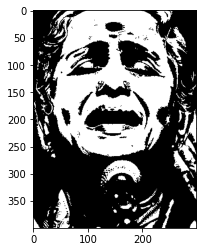

(<matplotlib.image.AxesImage at 0x7f228cb98050>, None)

In [7]:
import numpy as np
from matplotlib import pyplot as plt
mss = np.load('mss.npy')
plt.imshow(mss,cmap='gray'), plt.show()

In [8]:
inp = mss.flatten()
mk=''
for m in inp:
    mk += str(m)
xn = mk
yn = dmc_n(xn)


In [ ]:
print('INPUT MESSAGE : ',xn[45:95])
#print('.............................................................................')
print('CHANNEL OUTPUT :',yn[45:95])

INPUT MESSAGE :  00111111000000000000111111111111111100000000000000
CHANNEL OUTPUT : 11000000011001111110000000000101100011101111011111


error rate =  0.3391416666666667
error rate =  0.3391416666666667


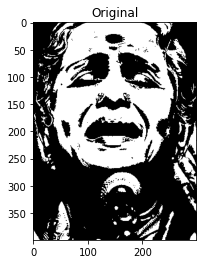

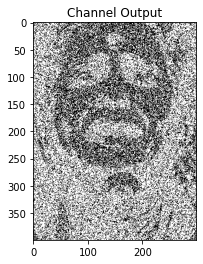

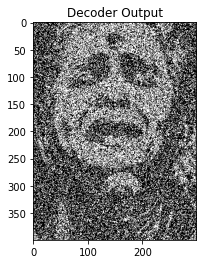

(<matplotlib.image.AxesImage at 0x7f228c5768d0>,
 Text(0.5, 1.0, 'Decoder Output'),
 None)

In [9]:
mss_in = np.array([int(x) for x in xn])
mss_in = mss_in.reshape(mss.shape)

mss_out = np.array([int(y) for y in yn])
mss_out = mss_out.reshape(mss.shape)

estimate_mk = ML_decoder(yn,Pylx)
estimate_mk1 = ML_decoder1(yn,alpha,beta)
mss_estimate = np.array([int(x) for x in estimate_mk]).reshape(mss.shape)

k=len(mk)
error_rate = hamming_distance(mk,estimate_mk)/k
error_rate1 = hamming_distance(mk,estimate_mk1)/k

print("error rate = ",error_rate)
print("error rate = ",error_rate1)
plt.imshow(mss_in,cmap='gray'),plt.title('Original'), plt.show() 
plt.imshow(mss_out,cmap='gray'), plt.title('Channel Output') , plt.show()
plt.imshow(mss_estimate,cmap='gray'), plt.title('Decoder Output'),plt.show() 

In [10]:
#problem 1.3 

def repetition_enc(mk , rep):
    k = len(mk)
    xn = ''
    for i in range(k):
        xn = xn + mk[i]*rep
    return xn


def repetition_dec(yn ,mk , rep):
    n =len(yn)
    output_mk = ''
    for i in range(0,n,rep):
        codeword = yn[i:i+rep]
        if sum(list(map(int,list(codeword)))) <=1 :
            output_mk += '0'
        else : 
            output_mk += '1'
    
    #Now estimate the output corrupted message bits with mk
    estimate_mk = ML_decoder(output_mk,Pylx)
    estimate_mk1 = ML_decoder1(output_mk,alpha,beta)
    return estimate_mk,estimate_mk1


In [13]:
#part 1
rep = 3
xn = repetition_enc(mk,rep)
#xn = repetition_enc(a,rep)
yn = dmc_n(xn)
#estimate_xn = ML_decoder(yn,alpha,beta)
estimate_mk,est_mk1 = repetition_dec(yn,mk,rep)
n=len(xn)
#error_rate_xn = hamming_distance(xn,estimate_xn)/n
error_rate_mk = hamming_distance(mk,estimate_mk)/len(mk)
error_rate_mk1 = hamming_distance(mk,est_mk1)/len(mk)
print("error rate = ",error_rate_mk)
print("error rate = ",error_rate_mk1)
#print("error rate of decoded message = ",error_rate_mk)

error rate =  0.26953333333333335
error rate =  0.26953333333333335


In [ ]:
print("error rate = ",error_rate_mk)

error rate =  0.09166666666666666


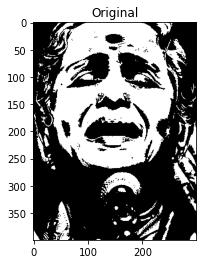

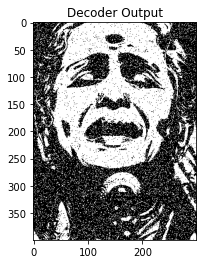

(<matplotlib.image.AxesImage at 0x7fd14a32e9d0>,
 Text(0.5, 1.0, 'Decoder Output'),
 None)

In [ ]:
mss_estimate = np.array([int(x) for x in estimate_mk]).reshape(mss.shape)
plt.imshow(mss_in,cmap='gray'),plt.title('Original'), plt.show() 
plt.imshow(mss_estimate,cmap='gray'),plt.title('Decoder Output'), plt.show() 

In [14]:
#Finding py5lx5
bin_list=[]
codewords = ['00000','00111','11100','11011']
Py5lx5 = np.array([])
for i in range(32):
    bin_list.append(format(i,'05b'))
#print(bin_list)
for code in codewords:
    for y in bin_list:
        py5lx5 = 1
        for i in range(len(code)):
            py5lx5 = py5lx5*Pylx[int(code[i])][int(y[i])]
        Py5lx5 = np.append(Py5lx5,py5lx5)
Py5lx5 = Py5lx5.reshape(4,32)

In [15]:
#part 2
'''
a = Pylx[0][0]
b = Pylx[0][1]
c = Pylx[1][0]
d = Pylx[1][1]

Py2lx2 = np.array([
[a**2 , a*b , b*a , b**2],
[a*c , a*d , b*c , b*d],
[c*a , c*b , d*a , d*b],
[c**2 , c*d , d*c , d**2]
])
'''

def dmc_block(xx):
    out_alphabet = bin_list
    py5givenx5 = {'00000' : Py5lx5[0,:] , '00111' : Py5lx5[1,:] ,'11100' : Py5lx5[2,:] , '11011' : Py5lx5[3,:]}
    yy = np.random.choice(out_alphabet,1,p=py5givenx5[xx])
    return yy[0]

def dmc_block_n(xn):
    yn = ''
    for i in range(0,len(xn)-4,5):
        yn += dmc_block(str(xn[i:i+5]))
    return yn

def ML_decoder_block(yn,Py5lx5):
    inp_alphabet = {0:'00' , 1: '01', 2 : '10' , 3 :'11'}
    out_alphabet = dict(zip(bin_list,[i for i in range(32)]))
    estimate_xn =''
    for i in range(0,len(yn)-4,5):
        estimate_xn = estimate_xn + inp_alphabet[np.argmax(Py5lx5[:,out_alphabet[yn[i:i+5]]])]
    return estimate_xn



In [17]:
encoder = {'00' : '00000', '01' : '00111', '10' : '11100' , '11' : '11011' } 
k = len(mk)
xn = ''
for i in range(0,k-1,2):
    xn = xn + encoder[mk[i:i+2]]
yn =dmc_block_n(xn)
estimate_mk = ML_decoder_block(yn,Py5lx5)
mss_estimate = np.array([int(x) for x in estimate_mk]).reshape(mss.shape)

error_rate = hamming_distance(estimate_mk,mk)/len(mk)
print('error rate =',error_rate)

error rate = 0.3174


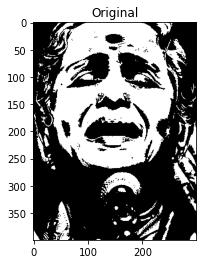

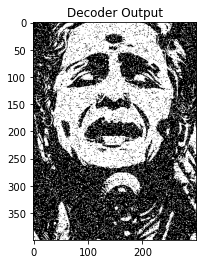

(<matplotlib.image.AxesImage at 0x7fd149338f70>,
 Text(0.5, 1.0, 'Decoder Output'),
 None)

In [ ]:
plt.imshow(mss_in,cmap='gray'),plt.title('Original'), plt.show() 
plt.imshow(mss_estimate,cmap='gray'),plt.title('Decoder Output'), plt.show() 